## Insurance Premium Prediction

#### Predicting health insurance premiums based on demographic and lifestyle factors.

##### Import Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import warnings 
warnings.filterwarnings("ignore")

##### Load Dataset

In [46]:
df = pd.read_csv('insurance.csv')

##### Data Exploration and Preprocessing

In [47]:
#First 5 rows
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [48]:
#Encoding categorical variables
df["sex"] = np.where(df["sex"] == "female", 0, 1)
df["smoker"] = np.where(df["smoker"] == "yes", 1, 0)

In [49]:
#Shape of the dataset
df.shape

(1338, 7)

In [50]:
#Basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 62.8+ KB


In [51]:
#Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [52]:
#Check duplicate values
df.duplicated().sum()

1

In [53]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)

In [54]:
#Setting the color theme for visuals
def set_color_map(color_list):
    return mcolors.LinearSegmentedColormap.from_list("custom_colormap", color_list)

color_list = ["#e1eedb", "#b4d4a4", "#7fb466", "#64a444", "#1a6333", "#3b3b3b"]
cmap_custom = set_color_map(color_list)

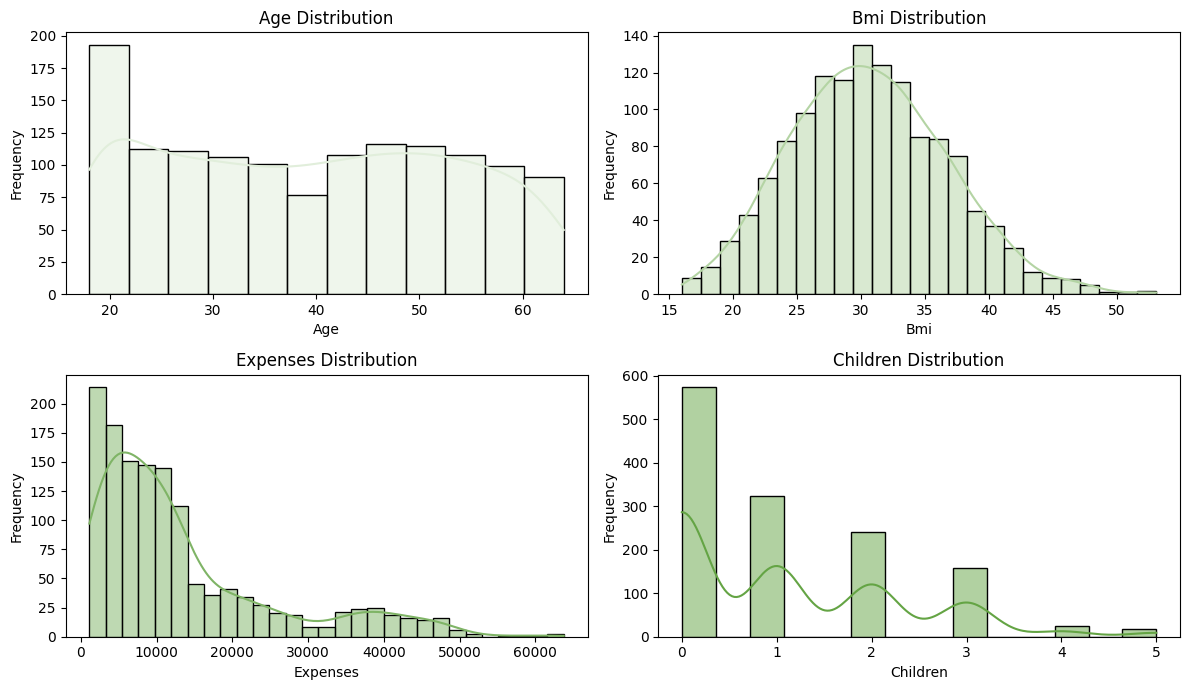

In [114]:
#Histograms for distributions
plt.figure(figsize=(12, 7))

num_vars = ['age', 'bmi', 'expenses', 'children']

#histograms for each numerical variable
for i, var in enumerate(num_vars, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[var], color=color_list[i-1], kde=True)
    plt.title(var.capitalize() + ' Distribution')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


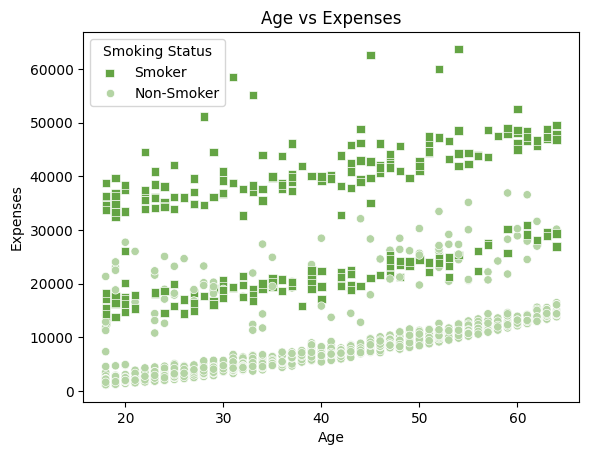

In [92]:
# Scatter plot for Age vs Expenses with smoking status distinction
sns.scatterplot(data=df, x='age', y='expenses', hue='smoker', style='smoker', 
                palette={0: color_list[1], 1: color_list[3]}, markers={0: 'o', 1: 's'})
plt.title('Age vs Expenses')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.legend(title='Smoking Status', labels=['Smoker', 'Non-Smoker'])
plt.show()

 From the above scatterplot, we can notice that:
- Expenses tend to increase with age.
- Smokers generally have higher expenses compared to non-smokers.

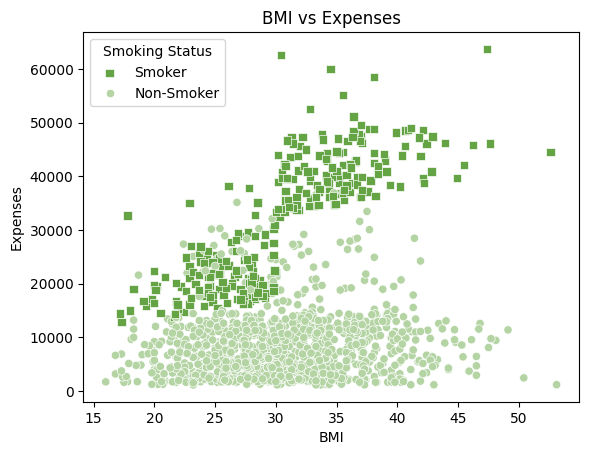

In [93]:
# Scatter plot for BMI vs Expenses with distinction of smoking status
sns.scatterplot(data=df, x='bmi', y='expenses', hue='smoker', style='smoker', 
                palette={0: color_list[1], 1: color_list[3]}, markers={0: 'o', 1: 's'})
plt.title('BMI vs Expenses')
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.legend(title='Smoking Status', labels=['Smoker', 'Non-Smoker'])
plt.show()

From the above scatterplot, we can see that
- For smokers, expenses increase with BMI.
- non-smokers exhibit a notable concentration within a specific range of BMI and expenses, indicating a clustering of data points in this region.

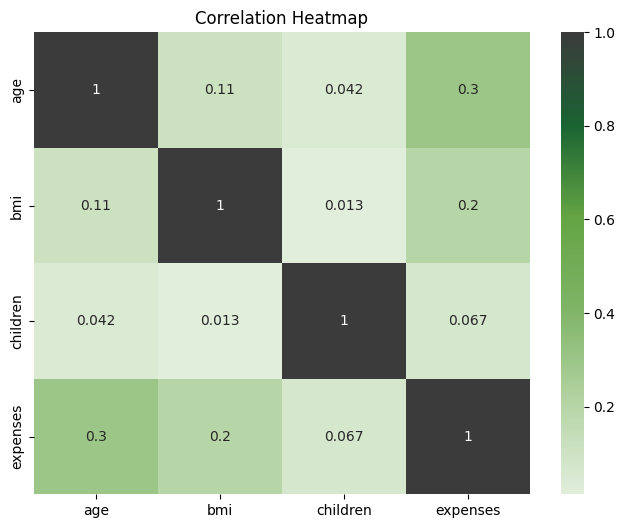

In [105]:
# Plotting correlation heatmap

# Selecting numerical variables
num_var = ['age', 'bmi', 'children', 'expenses']
num_df = df[num_var]

# Calculating correlation matrix
correl = num_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correl, annot=True, cmap=cmap_custom)
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap reveals predominantly weak relationships among the variables, with the highest correlation observed between age and expenses at 0.3. This suggests that linear associations between these variables are generally limited.

##### Building Models

In [115]:
#Splitting the data into features (X) and target (y)
X = df.drop(columns=['region', 'expenses'])
y = df['expenses']

In [116]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Polynomial Regression

In [119]:
# Create polynomial features of degree 3
polynomial_features = PolynomialFeatures(degree=3)

# Transform training and testing data to include polynomial features
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

# Initialize and fit polynomial regression model
polynomial_reg = LinearRegression(fit_intercept=False)
polynomial_reg.fit(X_train_poly, y_train)

# Predict using polynomial regression model
y_pred_pr = polynomial_reg.predict(X_test_poly)

# Calculate R-squared and RMSE for polynomial regression model
pr_r2 = r2_score(y_test, y_pred_pr)
pr_rmse = sqrt(mean_squared_error(y_test, y_pred_pr))

print("Polynomial Regression R^2 Score:", pr_r2)
print("Polynomial Regression RMSE:", pr_rmse)

Polynomial Regression R^2 Score: 0.8814508848125926
Polynomial Regression RMSE: 4667.3460693501875


#### Decision Tree

In [120]:
# Initialize and fit Decision Tree regression model with max depth of 5
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)
decision_tree_reg.fit(X_train, y_train)

# Predict using Decision Tree regression model
y_pred_dt = decision_tree_reg.predict(X_test)

# Calculate R-squared and RMSE for Decision Tree regression model
dt_r2 = r2_score(y_test, y_pred_dt)
dt_rmse = sqrt(mean_squared_error(y_test, y_pred_dt))

print("Decision Tree Regression R^2 Score:", dt_r2)
print("Decision Tree Regression RMSE:", dt_rmse)

Decision Tree Regression R^2 Score: 0.8931281115540821
Decision Tree Regression RMSE: 4431.518707403918


##### Random Forest

In [121]:
# Initialize and fit Random Forest regression model
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)
random_forest_reg.fit(X_train, y_train)

# Predict using Random Forest regression model
y_pred_rf = random_forest_reg.predict(X_test)

# Calculate R-squared and RMSE for Random Forest regression model
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regression R^2 Score:", rf_r2)
print("Random Forest Regression RMSE:", rf_rmse)

Random Forest Regression R^2 Score: 0.9002844173494156
Random Forest Regression RMSE: 4280.577465264635


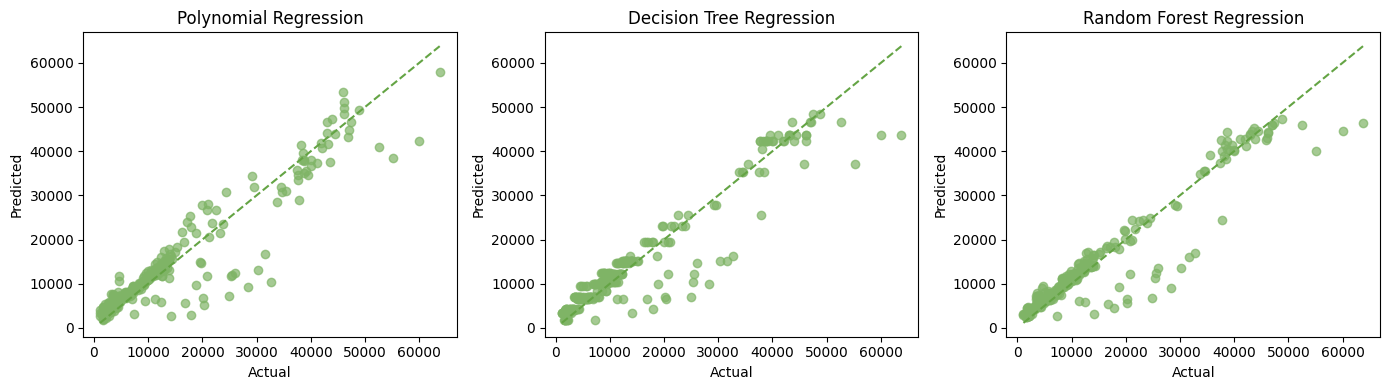

In [124]:
plt.figure(figsize=(14, 4))

# Plotting actual vs predicted values for Polynomial Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_pr, color=color_list[2], alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color=color_list[3])
plt.title('Polynomial Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting actual vs predicted values for Decision Tree Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, color=color_list[2], alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color=color_list[3])
plt.title('Decision Tree Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting actual vs predicted values for Random Forest Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, color=color_list[2], alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color=color_list[3])
plt.title('Random Forest Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

In [125]:
# Model Evaluation
print("Random Forest Regression R^2 Score:", rf_r2)
print("Random Forest Regression RMSE:", rf_rmse)
print("Decision Tree Regression R^2 Score:", dt_r2)
print("Decision Tree Regression RMSE:", dt_rmse)
print("Polynomial Regression R^2 Score:", pr_r2)
print("Polynomial Regression RMSE:", pr_rmse)

Random Forest Regression R^2 Score: 0.9002844173494156
Random Forest Regression RMSE: 4280.577465264635
Decision Tree Regression R^2 Score: 0.8931281115540821
Decision Tree Regression RMSE: 4431.518707403918
Polynomial Regression R^2 Score: 0.8814508848125926
Polynomial Regression RMSE: 4667.3460693501875



The R^2 scores for all three models are relatively high, indicating that they explain a significant portion of the variance in the data. However, despite similar performance in terms of R^2, there are slight differences in the RMSE values, suggesting that the Random Forest Regression model performs slightly better in terms of predicting the insurance expenses compared to the other two models.